# Comparing centers of 1996 and 2017



In this notebook I will try to find the biggest differences between the top20 nba centers of the two era.

The current state doesn't have the full insights, just a skecth up for each finding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Seasons_Stats.csv")

In [3]:
df = df.drop(['Unnamed: 0', 'blank2','blanl'],axis=1)

# Drop midseason trade rows 

Players who were traded mid-season appear multiple times. There are separete rows for each team he played for that year, and there is a row with the team tag 'TOT', which contains the player's statistics for the whole season. I leave this one in the the dataframe, and drop the other rows as they might do more harm than good with hurting the structure of the dataframe.

In [4]:
# the TOT tag indicates a trade, using the Year and Player value for filtering we get to the rows we want to drop
traded = df[df["Tm"] == "TOT"][["Player", "Year"]]

In [5]:
traded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 3 to 24672
Data columns (total 2 columns):
Player    2123 non-null object
Year      2123 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.8+ KB


In [7]:
fil2 = False
for i, row in traded.iterrows():
      fil2 = fil2 | ((df["Player"] == row.Player) & 
                    (df["Year"] == row.Year) & 
                    (df["Tm"] != "TOT"))   
fil2 = ~fil2

In [9]:
ezaz = df[fil2]

# /Drop midseason trade rows

In [10]:
#filter for centers 1996 and 2017 
cent96 =  (ezaz["Year"] == 1996) & (ezaz["Pos"] == "C")  & (ezaz["G"] > 20) & (ezaz["MP"]/ ezaz["G"] > 20)
cent17 =  (ezaz["Year"] == 2017) & (ezaz["Pos"] == "C")  & (ezaz["G"] > 20) & (ezaz["MP"]/ ezaz["G"] > 20)

In [11]:
cen17 = ezaz[cent17]
cen96 = ezaz[cent96]

#create Minuteg/Game column
cen17["MPG"] = cen17.MP / cen17.G 
cen96["MPG"] = cen96.MP / cen96.G 

# top 20 center from each era by minutes/game
cen96 = cen96.sort_values("MPG",ascending=False).head(20)
cen17 = cen17.sort_values("MPG",ascending=False).head(20)

C:\Users\Atis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Atis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# create /36 min stats from totals

In [24]:
# basic columns
need = ["Year", "Player","G", "MP", "MPG", "PER", "FG%", "FT%", "2P%", "3P%","VORP", "WS" , "USG%"]

#columns with totals need to to be converted to /36min
per36min= ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
         'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#columns in order
sortedcol = ['Year', 'Player', 'G', 'MP', "MPG", 'PER', "VORP", "WS" , "USG%",
       'FG/36m', 'FGA/36m', 'FG%',  '3P/36m', '3PA/36m', '3P%' , '2P/36m', '2PA/36m', '2P%', 'FT/36m',
       'FTA/36m', 'FT%', 'ORB/36m', 'DRB/36m', 'TRB/36m', 'AST/36m', 'STL/36m',
       'BLK/36m', 'TOV/36m', 'PF/36m', 'PTS/36m']

# a list for plotting 
forviolins = sortedcol[5:]

In [25]:
new = cen96.append(cen17)
new = new[need + per36min]

# converting the totals to /36minute stats
for col in per36min:
    new[col + '/36m'] = 36 * new[col] / new['MP']

    
#drop the columns with totals
new = new.drop(labels=per36min, axis=1)

new.Year = new.Year.astype(dtype='category')

In [26]:
new = new[sortedcol]

# Violinplots to spot differences  

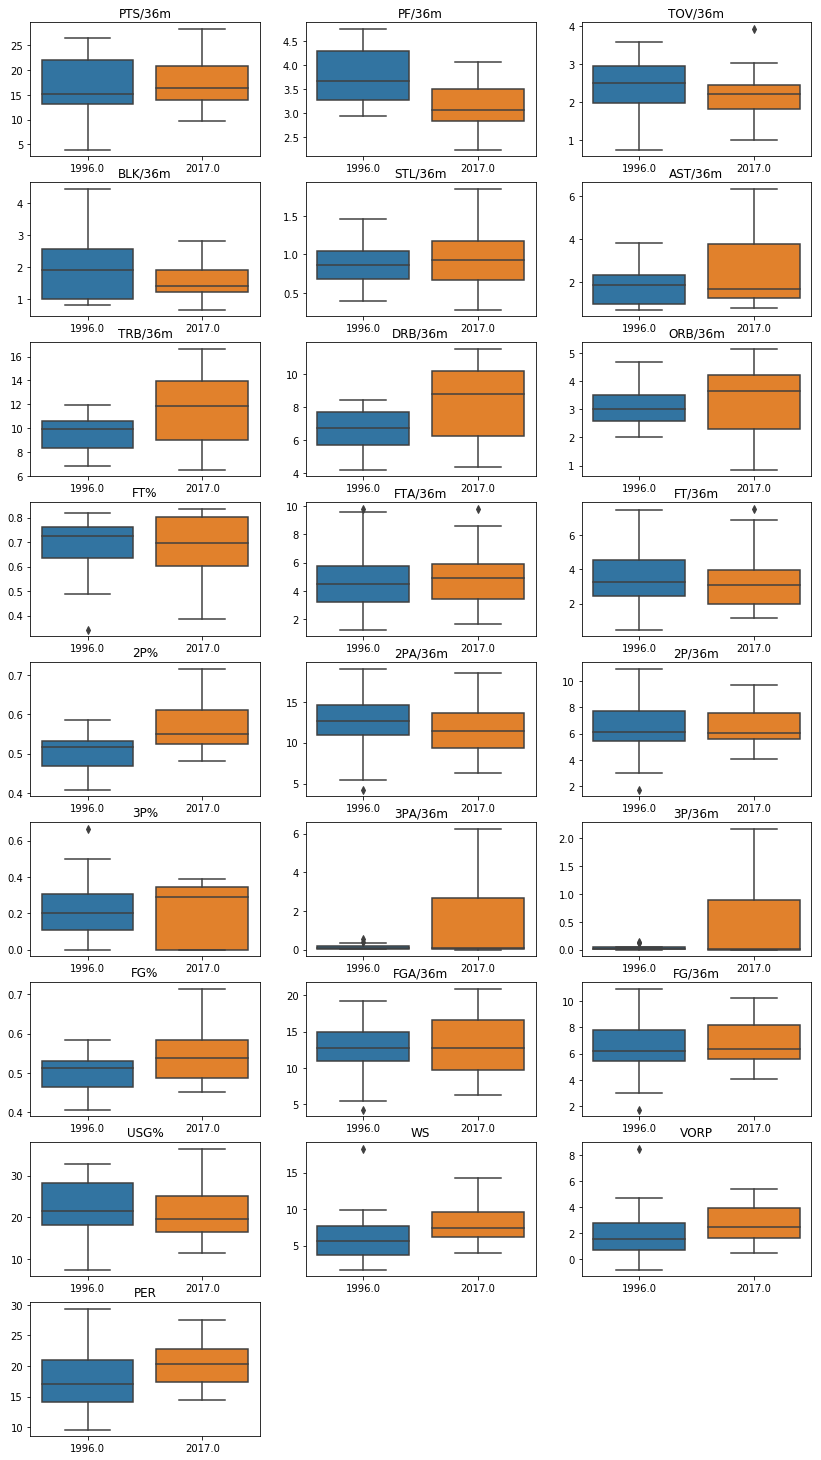

In [27]:
fig = plt.figure(figsize=(14,26))    
for i in range(1,26):
    ax = fig.add_subplot(9, 3, i )
    col = forviolins.pop()
    ax = sns.boxplot(data=new,x = "Year", y=col)
    
    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.show()

In [28]:
relevant = ["Year", "Player", "PER", "3PA/36m", "FGA/36m", "FG%", "TRB/36m", "BLK/36m", "PF/36m", "PTS/36m", "FT%"]

rz = new[relevant]

# Rebounding

- 2017 more diverse
- 1996 good reboundig is a must

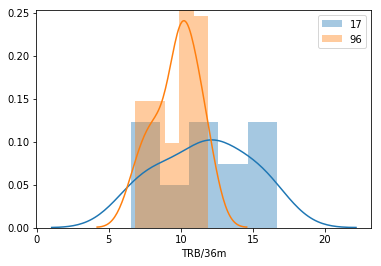

In [29]:
sns.distplot(rz[rz["Year"] == 2017]["TRB/36m"],label="17",bins=5)
sns.distplot(rz[rz["Year"] == 1996]["TRB/36m"],label="96",bins=5)
plt.legend()
plt.show()

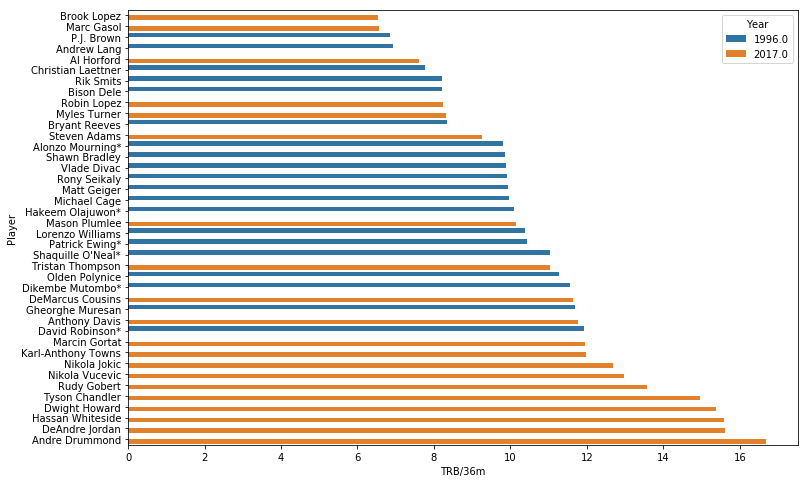

In [30]:
fig= plt.figure(figsize = (12,8))
vut = sns.barplot(data=rz.sort_values("TRB/36m"), x= "TRB/36m", y = "Player", hue="Year")

# Shot Blocking

- more shotblockers in 1996

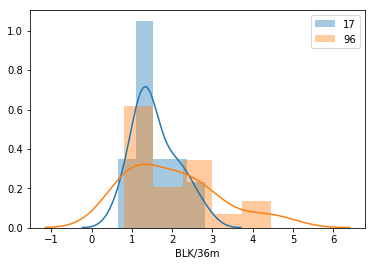

In [31]:
sns.distplot(rz[rz["Year"] == 2017]["BLK/36m"],label="17",bins=5)
sns.distplot(rz[rz["Year"] == 1996]["BLK/36m"],label="96",bins=5)
plt.legend()
plt.show()

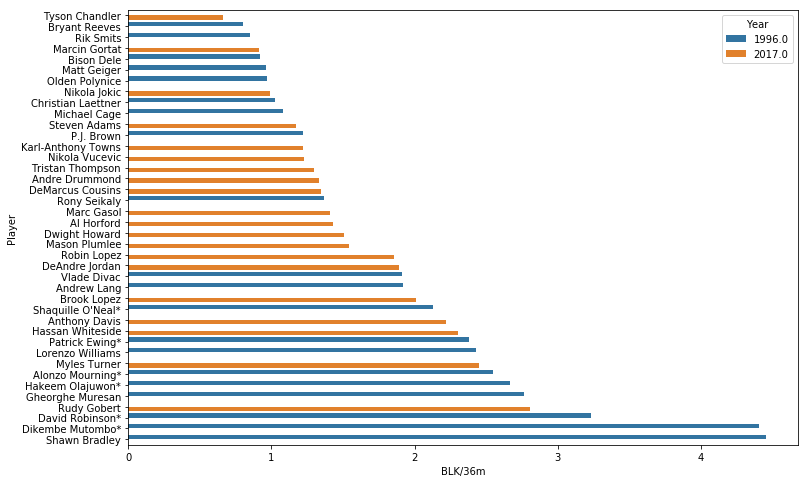

In [32]:
fig = plt.figure(figsize = (12,8))
vut = sns.barplot(data=rz.sort_values("BLK/36m"), x= "BLK/36m", y = "Player", hue="Year")

# 3 Point shots

- in 1996 there were no 3 point shooting centers 
- in 2017 around 1/3 of the top20 centers shot 3pointers

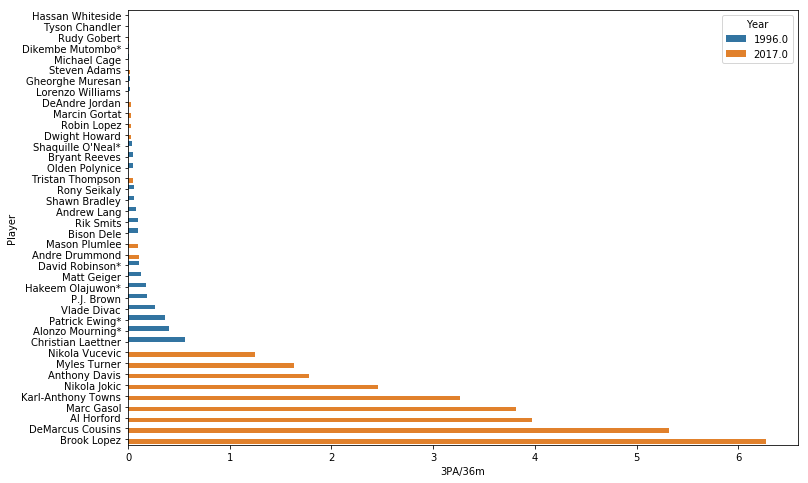

In [33]:
fig = plt.figure(figsize = (12,8))
vut = sns.barplot(data=rz.sort_values("3PA/36m"), x= "3PA/36m", y = "Player", hue="Year")

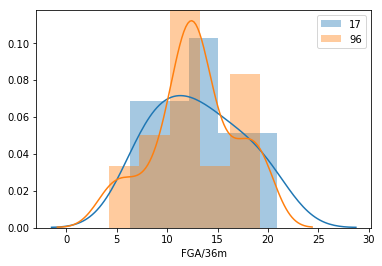

In [34]:
sns.distplot(rz[rz["Year"] == 2017]["FGA/36m"],label="17",bins=5)
sns.distplot(rz[rz["Year"] == 1996]["FGA/36m"],label="96",bins=5)
plt.legend()
plt.show()

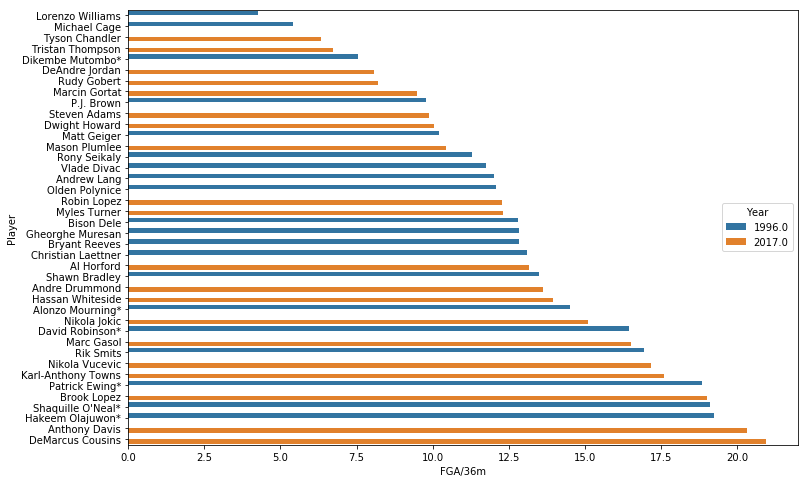

In [1148]:
fig = plt.figure(figsize = (12,8))
vut = sns.barplot(data=rz.sort_values("FGA/36m"), x= "FGA/36m", y = "Player", hue="Year")

# 2017 center types

- low field goal attempt, high FG%, high Rebounding, no 3pointer (Drummond, Howard)
- moderate field goal attempt, low Rebounding, 3 pointer (Horford, Gasol)
- high field goal attempt, moderate Rebounding, 3pointer (Towns, Anthony Davis)

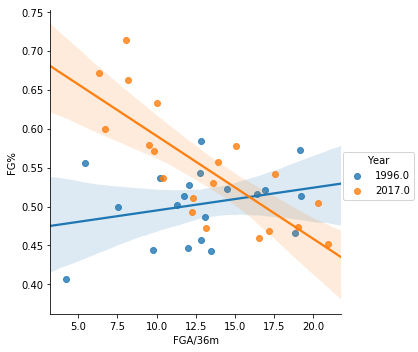

In [35]:
sns.lmplot(data=rz, x= "FGA/36m", y ="FG%", hue= "Year")


# Top3 centers from each era



In [36]:
topcent = set (["David Robinson*", "Hakeem Olajuwon*", "Shaquille O'Neal*", "Karl-Anthony Towns", "Anthony Davis", "DeMarcus Cousins"])

new[new.Player.isin(topcent)][relevant]

,Year,Player,PER,3PA/36m,FGA/36m,FG%,TRB/36m,BLK/36m,PF/36m,PTS/36m,FT%
12636,1996.0,Hakeem Olajuwon*,25.5,0.180193,19.229174,0.514,10.090812,2.664283,3.114766,24.918127,0.724
12697,1996.0,David Robinson*,29.4,0.107320,16.431931,0.516,11.924478,3.231534,3.124213,24.457105,0.761
12633,1996.0,Shaquille O'Neal*,26.4,0.036999,19.109969,0.573,11.025694,2.127441,3.570401,26.528263,0.487
24625,2017.0,Karl-Anthony Towns,26.0,3.267327,17.572277,0.542,11.964356,1.223762,2.863366,24.487129,0.832
24218,2017.0,Anthony Davis,27.5,1.781388,20.299852,0.504,11.778434,2.220089,2.233383,27.903988,0.802
24206,2017.0,DeMarcus Cousins,25.7,5.316024,20.928195,0.452,11.639757,1.343611,4.060041,28.361866,0.772


- biggest diffrence from data is 3point shooting 
- dominance, championchip titles

# END





# Clustering test

In [ ]:
"""
features = ['FGA/36m', "TRB/36m", "3PA/36m", "PER"]

rz[features].corr()

from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=4)

# Fitting the input data
kmeans = kmeans.fit(rz[features])


# Getting the cluster labels
labels = kmeans.predict(rz[features])
# Centroid values
centroids = kmeans.cluster_centers_

print(features)
print(centroids) # From sci-kit learn

rz["label"] = labels
"""